In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from pyparsing import conditionAsParseAction
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [25]:
# load the data and convert to a dataframe
data = 'winequality-red.csv'
df = pd.read_csv(data, sep=";")

In [5]:
# print the first 5 rows of the dataframe
print("----------------------------------------------------------")
print(df.head(5))
print("----------------------------------------------------------")

----------------------------------------------------------
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0    

In [6]:
# basic information about the dataframe
print('Cantidad de filas (observaciones) y columnas (variables):',df.shape)
print("----------------------------------------------------------")

Cantidad de filas (observaciones) y columnas (variables): (1599, 12)
----------------------------------------------------------


In [7]:
info = df.info()
print(info)
print("----------------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
----------------------------------------------------------


In [8]:
print('Tipo de datos: \n',df.dtypes)
print("----------------------------------------------------------")

Tipo de datos: 
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
----------------------------------------------------------


In [9]:
describe = df.describe()
print(describe)
print("----------------------------------------------------------")

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [10]:
# basic information about the dataframe, without using the describe function
for i in df.columns:
    print("\n\nVariable: ", df[i].name)
    print("Quantiles: ", df[i].quantile(q=[0.1, 0.25, 0.5]))
    print("Desviación estandar: ", df[i].std())
    print("Promedio: ", df[i].mean())
    print("Minimo: ", df[i].min())
    print("Maximo: ",df[i].max())
    print("----------------------------------------------------------")



Variable:  fixed acidity
Quantiles:  0.10    6.5
0.25    7.1
0.50    7.9
Name: fixed acidity, dtype: float64
Desviación estandar:  1.7410963181276953
Promedio:  8.31963727329581
Minimo:  4.6
Maximo:  15.9
----------------------------------------------------------


Variable:  volatile acidity
Quantiles:  0.10    0.31
0.25    0.39
0.50    0.52
Name: volatile acidity, dtype: float64
Desviación estandar:  0.17905970415353537
Promedio:  0.5278205128205128
Minimo:  0.12
Maximo:  1.58
----------------------------------------------------------


Variable:  citric acid
Quantiles:  0.10    0.01
0.25    0.09
0.50    0.26
Name: citric acid, dtype: float64
Desviación estandar:  0.19480113740531857
Promedio:  0.2709756097560976
Minimo:  0.0
Maximo:  1.0
----------------------------------------------------------


Variable:  residual sugar
Quantiles:  0.10    1.7
0.25    1.9
0.50    2.2
Name: residual sugar, dtype: float64
Desviación estandar:  1.4099280595072798
Promedio:  2.53880550343965
Minimo

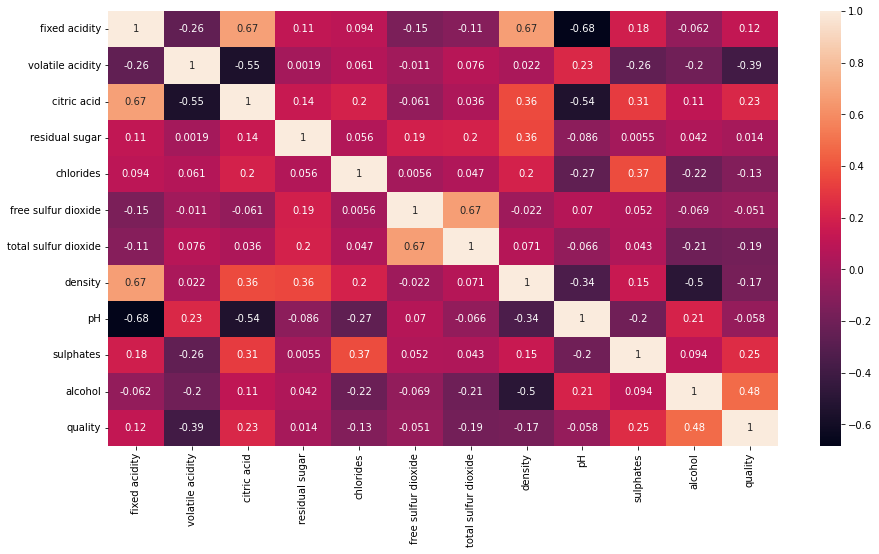

In [11]:
# correlation heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_7192\4121001674.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


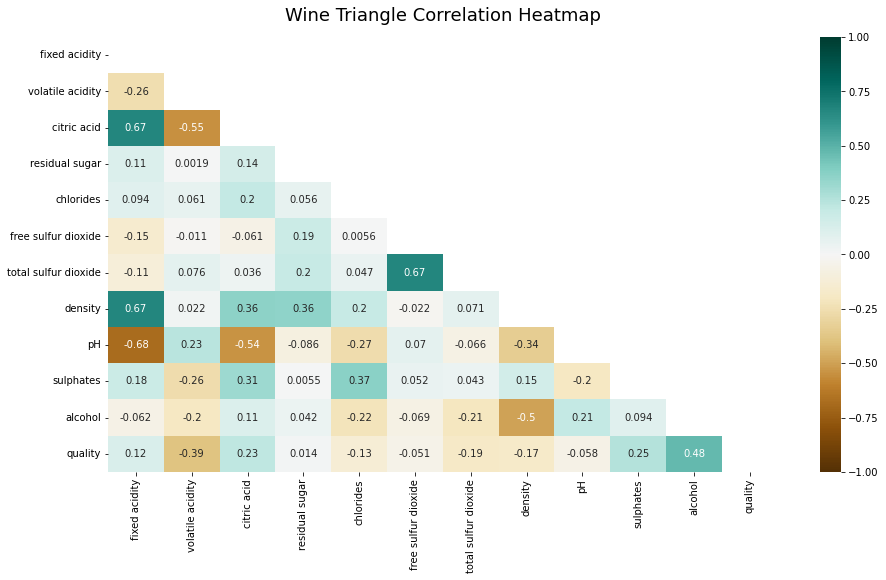

<Figure size 1080x576 with 0 Axes>

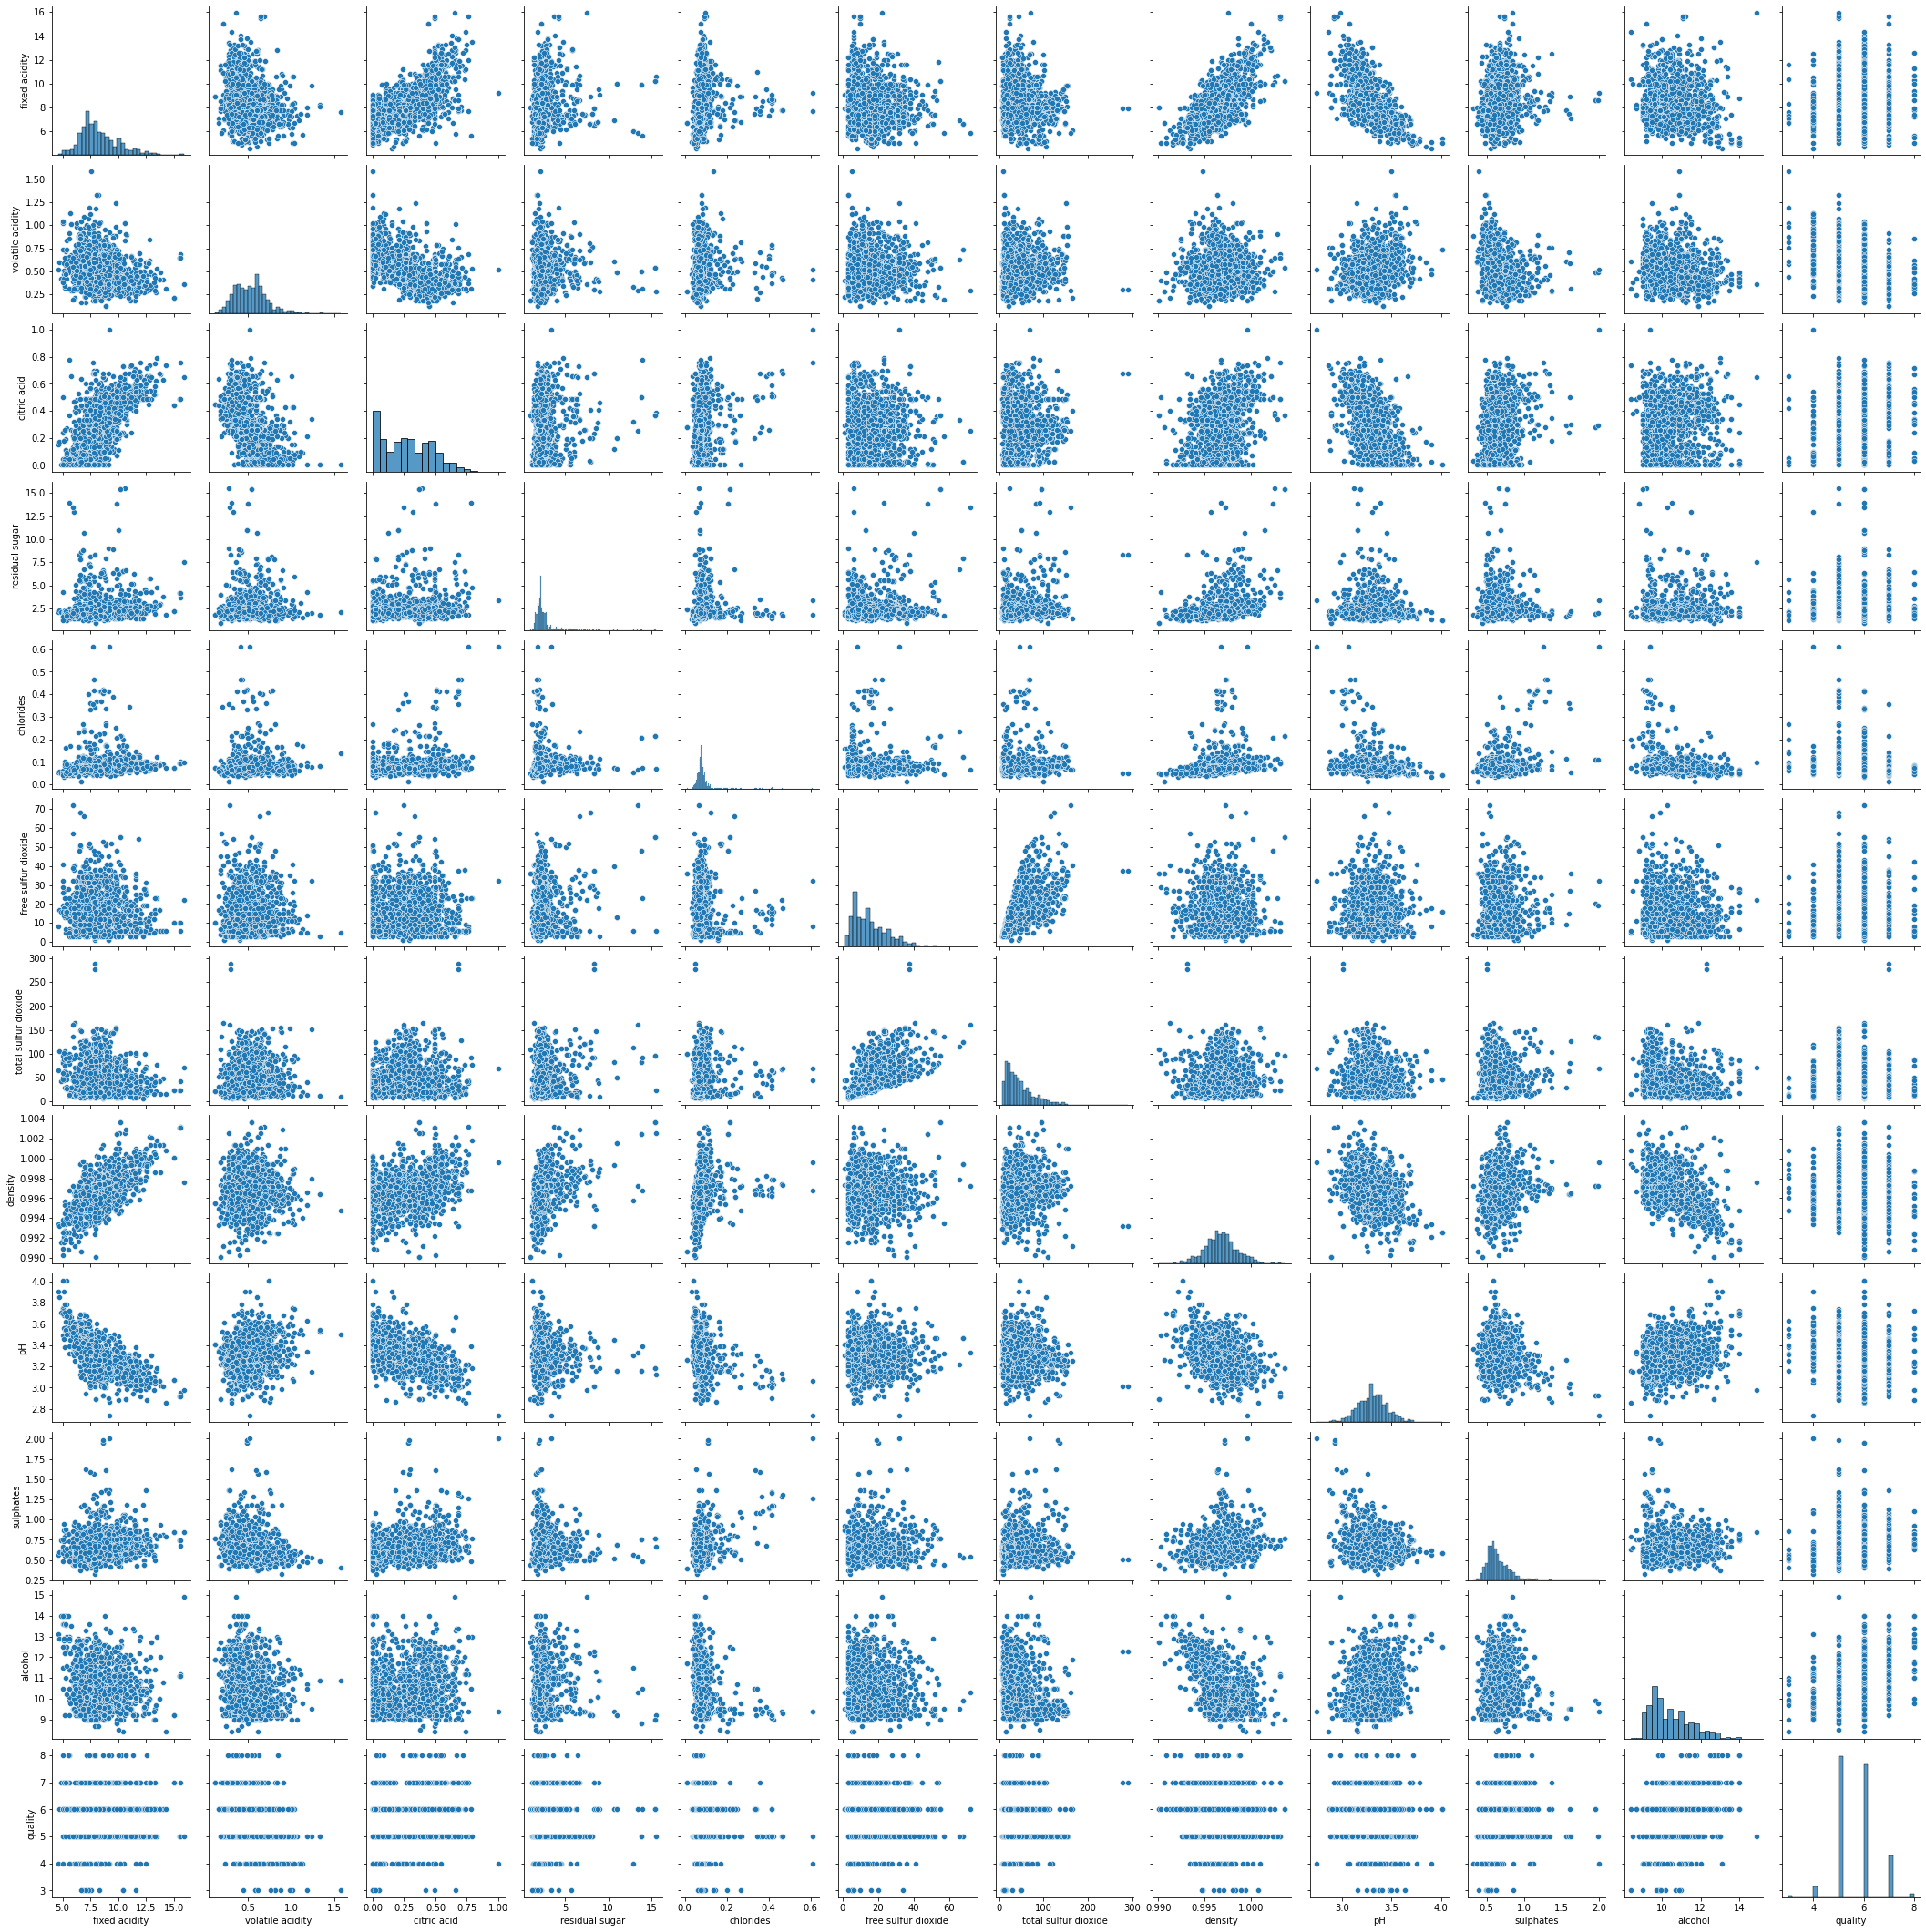

In [12]:
# Heatmap de la matriz de correlacion
plt.figure(figsize = (15,8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.figure(figsize = (15,8))
heatmap.set_title('Wine Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

sns.pairplot(df)
plt.show(block=False)

Text(0.5, 1.0, 'Total sulfur dioxide plotted against quality')

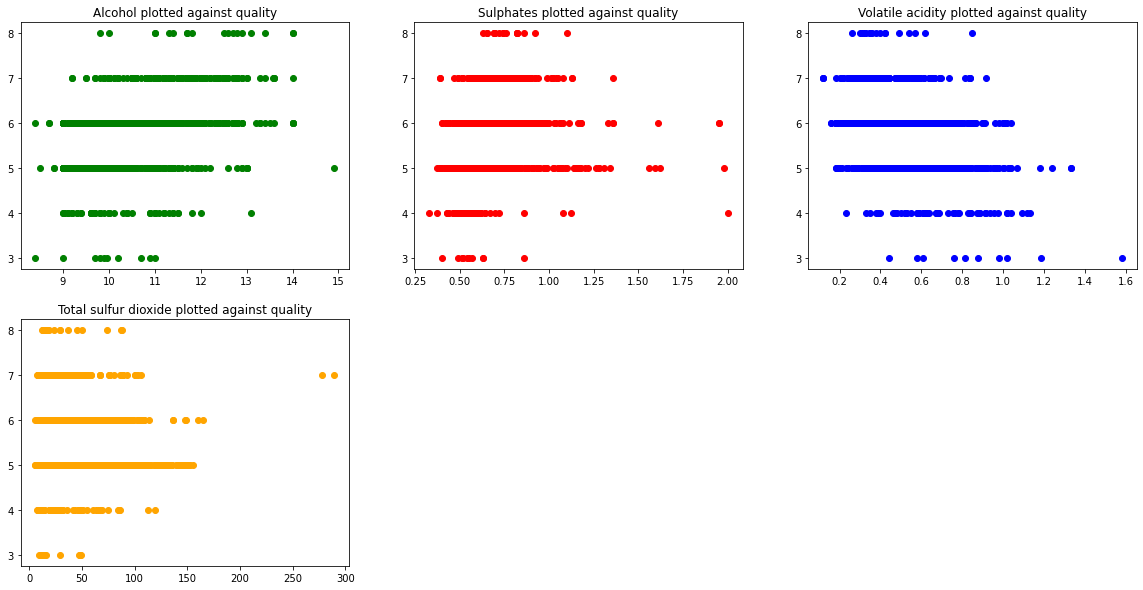

In [13]:
# scatter subplots

plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
x = df['alcohol']
plt.scatter(x, df['quality'], c='green')
plt.title('Alcohol plotted against quality')

plt.subplot(2,3,2)
x = df['sulphates']
plt.scatter(x, df['quality'], c='red')
plt.title('Sulphates plotted against quality')

plt.subplot(2,3,3)
x = df['volatile acidity']
plt.scatter(x, df['quality'], c='blue')
plt.title('Volatile acidity plotted against quality')

plt.subplot(2,3,4)
x = df['total sulfur dioxide']
plt.scatter(x, df['quality'], c='orange')
plt.title('Total sulfur dioxide plotted against quality')

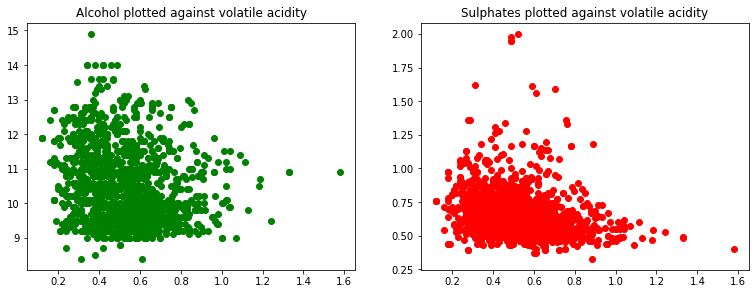

In [14]:
# scatter plot of the chosen columns

plt.figure(figsize = (20,10))

x = df['volatile acidity']
plt.subplot(2,3,1)
plt.scatter(x, df['alcohol'], c='green')
plt.title('Alcohol plotted against volatile acidity')

x = df['volatile acidity']
plt.subplot(2,3,2)
plt.scatter(x, df['sulphates'], c='red')
plt.title('Sulphates plotted against volatile acidity')

plt.show()

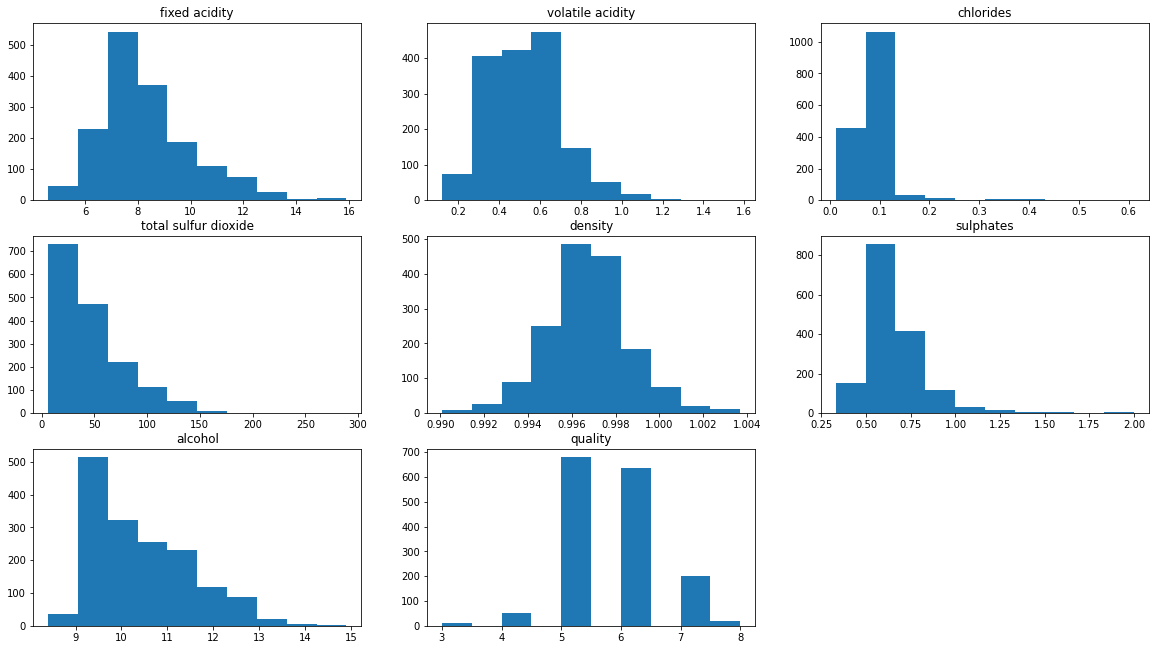

In [14]:
# histograms
index = 1
plt.figure(figsize=(20,15))
for i in df.columns:
    plt.subplot(4,3,index)
    plt.hist(df[i])
    plt.title(i)
    index += 1
plt.show()

## Regresión lineal múltiple

#### Normalizado y Escalado

In [26]:
#Feature Selection
# df = df.drop(['residual sugar', 'free sulfur dioxide', 'density', 'fixed acidity', 'total sulfur dioxide'], axis=1)
df = df.drop(['residual sugar', 'free sulfur dioxide', 'pH', 'fixed acidity', 'chlorides'], axis=1)

In [27]:
#Reduce dataset to only the variables that are correlated with quality
print(df.head())

   volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
0              0.70         0.00                  34.0   0.9978       0.56   
1              0.88         0.00                  67.0   0.9968       0.68   
2              0.76         0.04                  54.0   0.9970       0.65   
3              0.28         0.56                  60.0   0.9980       0.58   
4              0.70         0.00                  34.0   0.9978       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  


In [28]:
#Non Normalize Data
X = df.iloc[:,:6]
y = df.iloc[:,6]

# Scaling the data
standard = preprocessing.scale(X)

# Normalizing the data
df_norm = (standard - standard.min()) / (standard.max() - standard.min())
df_norm = pd.DataFrame(df_norm)
#Normalize Data
X_norm = df_norm.iloc[:,:6]

print("----------------------------------------------------------")
print(X)
print(y)
print("----------------------------------------------------------")
print(X_norm)
print(y)

----------------------------------------------------------
      volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
0                0.700         0.00                  34.0  0.99780       0.56   
1                0.880         0.00                  67.0  0.99680       0.68   
2                0.760         0.04                  54.0  0.99700       0.65   
3                0.280         0.56                  60.0  0.99800       0.58   
4                0.700         0.00                  34.0  0.99780       0.56   
...                ...          ...                   ...      ...        ...   
1594             0.600         0.08                  44.0  0.99490       0.58   
1595             0.550         0.10                  51.0  0.99512       0.76   
1596             0.510         0.13                  40.0  0.99574       0.75   
1597             0.645         0.12                  44.0  0.99547       0.71   
1598             0.310         0.47               

In [59]:
#Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Spliting the data into training and testing sets (Normalize)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.2, random_state=0)


In [60]:
# ----------- LINEAR REGRESSION with the selected features ---------
"""
    This algorithm uses Ordinary Least Squares (OLS) to estimate the coefficients of a linear model.
"""

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# ----------- Non Normalized Data ---------
print("---- Non Normalized Data ---------\n")

lr_multiple = LinearRegression()

# Training model
lr_multiple.fit(X_train, y_train)

# Testing model
y_pred = lr_multiple.predict(X_test)
print('Coefficients: \n', lr_multiple.coef_)
print('\nIntercept: ', lr_multiple.intercept_)

print("y = {:.4f} + {:.4f}x1 + {:.4f}x2 + {:.4f}x3 + {:.4f}x4 + {:.4f}x5 + {:.4f}x6".format(lr_multiple.intercept_, lr_multiple.coef_[0], lr_multiple.coef_[1], lr_multiple.coef_[2], lr_multiple.coef_[3], lr_multiple.coef_[4], lr_multiple.coef_[5]))
print("\n--Metricas--")
print(" Mean squared error: {:.6f}\n r2_score: {:.4f}\n Mean Absolute Error: {:.4f}\n explained_variance_score: {:.6f} \n precision: {:.6f}".format(mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred),mean_absolute_error(y_test, y_pred),explained_variance_score(y_test, y_pred),lr_multiple.score(X_test, y_test)))

# ----------- Normalized Data ---------
print("\n---- Normalized Data ----\n")
lr_multiple = LinearRegression()

# Training model
lr_multiple.fit(X_train_norm, y_train_norm)

# Testing model
y_pred = lr_multiple.predict(X_test_norm)
print('Coefficients: \n', lr_multiple.coef_)
print('\nIntercept: ', lr_multiple.intercept_)

print("y = {:.4f} + {:.4f}x1 + {:.4f}x2 + {:.4f}x3 + {:.4f}x4 + {:.4f}x5 + {:.4f}x6".format(lr_multiple.intercept_, lr_multiple.coef_[0], lr_multiple.coef_[1], lr_multiple.coef_[2], lr_multiple.coef_[3], lr_multiple.coef_[4], lr_multiple.coef_[5]))

print("\n--Metricas--")
print(" Mean squared error: {:.6f}\n r2_score: {:.4f}\n Mean Absolute Error: {:.4f}\n explained_variance_score: {:.6f} \n Precision:{:.6f}".format(mean_squared_error(y_test_norm, y_pred),r2_score(y_test_norm, y_pred),mean_absolute_error(y_test_norm, y_pred),explained_variance_score(y_test_norm, y_pred),lr_multiple.score(X_test_norm, y_test_norm)))

---- Non Normalized Data ---------

Coefficients: 
 [-1.31569299e+00 -9.63737980e-02 -2.04622319e-03  1.03183547e+01
  6.88820125e-01  3.10973694e-01]

Intercept:  -7.510808014745659
y = -7.5108 + -1.3157x1 + -0.0964x2 + -0.0020x3 + 10.3184x4 + 0.6888x5 + 0.3110x6

--Metricas--
 Mean squared error: 0.394285
 r2_score: 0.3112
 Mean Absolute Error: 0.4759
 explained_variance_score: 0.323742 
 precision: 0.311245

---- Normalized Data ----

Coefficients: 
 [-2.69837905 -0.21503096 -0.77097041  0.22305386  1.3373465   3.79573548]

Intercept:  5.136611521854631
y = 5.1366 + -2.6984x1 + -0.2150x2 + -0.7710x3 + 0.2231x4 + 1.3373x5 + 3.7957x6

--Metricas--
 Mean squared error: 0.394285
 r2_score: 0.3112
 Mean Absolute Error: 0.4759
 explained_variance_score: 0.323742 
 Precision:0.311245


In [61]:
# GridSearchCV for Ridge Regression with Cross Validation of 5 folds

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# function to get cross validation scores

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

alpha = [0.000001,0.00001,0.001, 0.01, 0.1, 1, 10]
param_grid = dict(alpha=alpha)

# find optimal alpha with grid search using non normalized data
print("---- Non Normalized Data ----\n")
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

# find optimal alpha with grid search using normalized data
print("\n---- Normalized Data ----\n")
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_norm, y_train_norm)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

---- Non Normalized Data ----

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.3349575703701436
Best Params:  {'alpha': 1}

---- Normalized Data ----

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.3337607058462327
Best Params:  {'alpha': 0.1}


In [63]:
# ----------- Ridge REGRESSION ---------
"""
    This algorithm uses OLS but addresses somo of the problems that the algorithm has 
    by imposing a penalty on the size of the coefficients.
"""

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# ----------- Non Normalized Data ---------
print("---- Non Normalized Data ---------\n")

# Training and testing data
model = Ridge(alpha=1)

# Training model
model.fit(X_train, y_train)

# Testing model
y_pred = model.predict(X_test)
print('Coefficients: \n', model.coef_)
print('\nIntercept: ', model.intercept_)

print("y = {:.4f} + {:.4f}x1 + {:.4f}x2 + {:.4f}x3".format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))

print("\n--Metricas--")
print(" Mean squared error: {:.6f}\n r2_score: {:.4f}\n Mean Absolute Error: {:.4f}\n explained_variance_score: {:.6f} \n precision: {:.6f}".format(mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred),mean_absolute_error(y_test, y_pred),explained_variance_score(y_test, y_pred),model.score(X_test, y_test)))

# ----------- Normalized Data ---------
print("---- Normalized Data ----\n")
# Training and testing Data

model = Ridge(alpha=0.1)

# Training model
model.fit(X_train_norm, y_train_norm)

# Testing model
y_pred = model.predict(X_test_norm)
print('Coefficients: \n', model.coef_)
print('\nIntercept: ', model.intercept_)

print("y = {:.4f} + {:.4f}x1 + {:.4f}x2 + {:.4f}x3".format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))

print("\n--Metricas--")
print(" Mean squared error: {:.6f}\n r2_score: {:.4f}\n Mean Absolute Error: {:.4f}\n explained_variance_score: {:.6f} \n Precision:{:.6f}".format(mean_squared_error(y_test_norm, y_pred),r2_score(y_test_norm, y_pred),mean_absolute_error(y_test_norm, y_pred),explained_variance_score(y_test_norm, y_pred),model.score(X_test_norm, y_test_norm)))

---- Non Normalized Data ---------

Coefficients: 
 [-1.24916794 -0.01871094 -0.00210197  0.02219694  0.68457177  0.30197279]

Intercept:  2.7947291406901194
y = 2.7947 + -1.2492x1 + -0.0187x2 + -0.0021x3

--Metricas--
 Mean squared error: 0.393858
 r2_score: 0.3120
 Mean Absolute Error: 0.4750
 explained_variance_score: 0.324242 
 precision: 0.311992
---- Normalized Data ----

Coefficients: 
 [-2.65434966 -0.16179621 -0.77708008  0.17141371  1.33316552  3.73302544]

Intercept:  5.144983575114654
y = 5.1450 + -2.6543x1 + -0.1618x2 + -0.7771x3

--Metricas--
 Mean squared error: 0.393847
 r2_score: 0.3120
 Mean Absolute Error: 0.4757
 explained_variance_score: 0.324384 
 Precision:0.312010


In [68]:
# GridSearchCV for Lasso Regression with Cross Validation of 5 folds

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# function to get cross validation scores

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

alpha = [0.000001, 0.00001, 0.001, 0.01, 0.1, 1, 10]
param_grid = dict(alpha=alpha)

# find optimal alpha with grid search using non normalized data
print("---- Non Normalized Data ----\n")
grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

# find optimal alpha with grid search using normalized data
print("---- Normalized Data ----\n")
grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_norm, y_train_norm)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

---- Non Normalized Data ----

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.3267079700598142
Best Params:  {'alpha': 0.001}
---- Normalized Data ----

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.33591062580289177
Best Params:  {'alpha': 0.001}


In [69]:
# ----------- Lasso REGRESSION ---------
"""
    The Lasso is a linear model that estimates sparse coefficients. 
    It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, 
    effectively reducing the number of features upon which the given solution is dependent.
"""

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# ----------- Non Normalized Data ---------
print("---- Non Normalized Data ---------\n")

# Training and testing data
model = Lasso(alpha=0.001)

# Training model
model.fit(X_train, y_train)

# Testing model
y_pred = model.predict(X_test)
print('Coefficients: \n', model.coef_)
print('\nIntercept: ', model.intercept_)

print("y = {:.4f} + {:.4f}x1 + {:.4f}x2 + {:.4f}x3".format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))

print("\n--Metricas--")
print(" Mean squared error: {:.6f}\n r2_score: {:.4f}\n Mean Absolute Error: {:.4f}\n explained_variance_score: {:.6f} \n precision: {:.6f}".format(mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred),mean_absolute_error(y_test, y_pred),explained_variance_score(y_test, y_pred),model.score(X_test, y_test)))

# ----------- Normalized Data ---------
print("---- Normalized Data ----\n")
# Training and testing data
model = Lasso(alpha=0.001)

# Training model
model.fit(X_train, y_train)

# Testing model
y_pred = model.predict(X_test_norm)
print('Coefficients: \n', model.coef_)
print('\nIntercept: ', model.intercept_)

print("y = {:.4f} + {:.4f}x1 + {:.4f}x2 + {:.4f}x3".format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))

print("\n--Metricas--")
print(" Mean squared error: {:.6f}\n r2_score: {:.4f}\n Mean Absolute Error: {:.4f}\n explained_variance_score: {:.6f} \n Precision:{:.6f}".format(mean_squared_error(y_test_norm, y_pred),r2_score(y_test_norm, y_pred),mean_absolute_error(y_test_norm, y_pred),explained_variance_score(y_test_norm, y_pred),model.score(X_test_norm, y_test_norm)))

---- Non Normalized Data ---------

Coefficients: 
 [-2.294496    0.04884578 -0.73166235  0.          1.20629595  3.57993614]

Intercept:  5.084548043960922
y = 5.0845 + -2.2945x1 + 0.0488x2 + -0.7317x3

--Metricas--
 Mean squared error: 0.379087
 r2_score: 0.3655
 Mean Absolute Error: 0.4828
 explained_variance_score: 0.367687 
 precision: 0.365503
---- Normalized Data ----

Coefficients: 
 [-2.294496    0.04884578 -0.73166235  0.          1.20629595  3.57993614]

Intercept:  5.084548043960922
y = 5.0845 + -2.2945x1 + 0.0488x2 + -0.7317x3

--Metricas--
 Mean squared error: 0.390430
 r2_score: 0.3180
 Mean Absolute Error: 0.4740
 explained_variance_score: 0.327133 
 Precision:0.317980


In [71]:
# GridSearchCV Random Forest Regression with Cross Validation of 5 folds

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# function to get cross validation scores

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

n_estimator = [100, 200, 300, 500]
param_grid = dict(n_estimators=n_estimator)

# find optimal alpha with grid search using non normalized data
print("---- Non Normalized Data ----\n")
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

# find optimal alpha with grid search using normalized data
print("---- Normalized Data ----\n")
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_norm, y_train_norm)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

---- Non Normalized Data ----

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Score:  0.4043239080170958
Best Params:  {'n_estimators': 500}
---- Normalized Data ----

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Score:  0.4247533828654462
Best Params:  {'n_estimators': 500}


In [75]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# ----------- Non Normalized Data ---------
print("---- Non Normalized Data ---------\n")

# Training and testing data
model = RandomForestRegressor(n_estimators = 500,random_state=0)

# Training model
model.fit(X_train, y_train)

# Testing model
y_pred = model.predict(X_test)

print("\n--Metricas--")
print(" Mean squared error: {:.6f}\n r2_score: {:.4f}\n Mean Absolute Error: {:.4f}\n explained_variance_score: {:.6f} \n precision: {:.6f}".format(mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred),mean_absolute_error(y_test, y_pred),explained_variance_score(y_test, y_pred),model.score(X_test, y_test)))

# ----------- Normalized Data ---------
print("---- Normalized Data ----\n")
# Training and testing data
model = RandomForestRegressor(n_estimators = 500,random_state=0)

# Training model
model.fit(X_train_norm, y_train_norm)

# Testing model
y_pred = model.predict(X_test_norm)

print("\n--Metricas--")
print(" Mean squared error: {:.6f}\n r2_score: {:.4f}\n Mean Absolute Error: {:.4f}\n explained_variance_score: {:.6f} \n Precision:{:.6f}".format(mean_squared_error(y_test_norm, y_pred),r2_score(y_test_norm, y_pred),mean_absolute_error(y_test_norm, y_pred),explained_variance_score(y_test_norm, y_pred),model.score(X_test_norm, y_test_norm)))



---- Non Normalized Data ---------


--Metricas--
 Mean squared error: 0.282020
 r2_score: 0.5280
 Mean Absolute Error: 0.3816
 explained_variance_score: 0.529406 
 precision: 0.527969
---- Normalized Data ----


--Metricas--
 Mean squared error: 0.349602
 r2_score: 0.3893
 Mean Absolute Error: 0.4217
 explained_variance_score: 0.396905 
 Precision:0.389300
